In [1]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import srkgraphics
import srkanalysis
import srktext
import itertools
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 14
rcParams['xtick.labelsize'] = 20
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Arial')
graphs_dir='/home/mjbales/work/nedm/graphs/'

b_gradient_str = [1.e-10, 1.e-9, 1.e-8]
Omega_range=srkmisc.even_sample_over_log(.1, 10, 100)
legend_titles_b_gradients=[str(x)+' T/m B Gradient' for x in b_gradient_str]
omega_0=(4.84578839927e7*1e-6)
Omega_scale_factor= 0.235*(4.84578839927e7*1e-6)
eta=0.235*omega_0*10e6/(1e-6*299792458*299792458)

import ROOT
from ROOT import TF1,gPad,gStyle,TCanvas,TH1D,gROOT,TLegend
import rootnotes
# import rootprint
gStyle.SetOptFit()
gStyle.SetOptStat(0)
gStyle.SetOptTitle(0)
gStyle.SetPadTickX(1)
gStyle.SetPadTickY(1)
gStyle.SetGridColor(12)
gROOT.ForceStyle();
c1=rootnotes.canvas("Canvas", (800, 600))
# c1.SetRightMargin(0.3)
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
histogram3 = TH1D("phi_hist3","phi_hist3",100,-5,5)

100 3.89112902246e-06 20.1850794547
100 0.0572079896473 12.3726338305
99596.0
99810.0


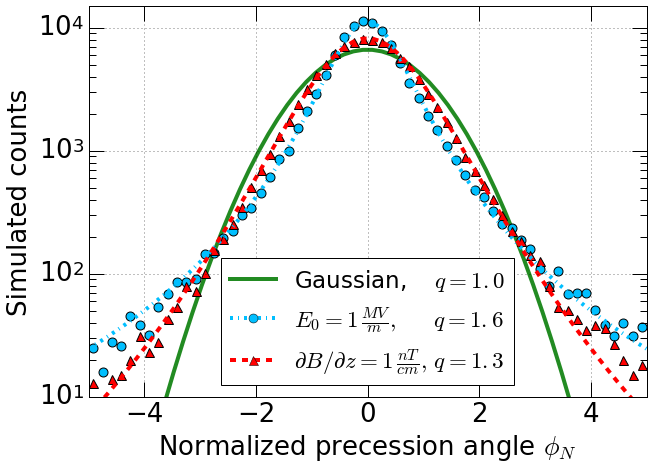

In [8]:
reload(srktext)
rids = [7371,7377]
legend_titles=[r"$E_0= 1\,\frac{MV}{m},\,\,\,\,\,\,\,\,\,\, q=1.6$",
               r"$\partial B /\partial z=1\,\frac{nT}{cm},\, q=1.3$",
               r"Gaussian, $\,\,\,\,\,\,q=1.0$"
              ]
# legend_titles=[r"$E_0= 1\,\frac{MV}{m}$",
#                r"$\partial B /\partial Z=1\,\frac{nT}{cm}$",
#                r"Gaussian"
#               ]
hist_dim = (60,-5,5)
par=True
par_str='Par_' if par else 'Anti_'



# Make Hists
for x in rids:
    file_path_txt="/home/mjbales/work/nedm/hists/NormPhiDist_"+par_str+"RID%i" % x + ".txt"
    mean,stdev,time,q_ROOT= srkdata.get_data_for_rids_from_database([x],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit,"+par_str+"PhiKurtosis")[0]
    draw_string="(phi-"+str(mean)+")/"+str(stdev)
    srktext.make_txt_hist_from_root_file(file_path_txt, x, par, draw_string, hist_dim)
    print time,stdev,q_ROOT
    

rcParams['figure.figsize'] = 8, 5
rcParams['xtick.labelsize'] = 26
rcParams['ytick.labelsize'] = 26
y_axis_title=r"Simulated counts"
main_title = ''
x_axis_title = r'Normalized precession angle $\phi_N$'
titles=[main_title,x_axis_title,y_axis_title]
colors=['deepskyblue','red','forestgreen']


linestyles=["-.","--","-"]
markers=['o', '^', 's', 'v']

fig1 = plt.figure(figsize=[10,7])
ax = fig1.add_subplot(1, 1, 1)


x = np.linspace(-5,5,60)
plt.plot(x,100000/6*mlab.normpdf(x,0,1),label=legend_titles[2],c="forestgreen",linewidth=4,linestyle=linestyles[2])
    

for i in xrange(len(rids)):
    file_path_txt="/home/mjbales/work/nedm/hists/NormPhiDist_"+par_str+"RID%i" % rids[i] + ".txt"
    x,y,y_e=srktext.delimited_text_to_data(file_path_txt)
    print sum(y)
#     plt.plot(x, y,label = legend_titles[i],c=colors[i],linewidth=3,ls="steps",linestyle=linestyles[i])
#     plt.plot(x, y,'o',label = legend_titles[i],c=colors[i],markeredgecolor=colors[i],markeredgewidth=0.0,marker=markers[i],ms=9)
    plt.plot(x, y,'o',label = legend_titles[i],c=colors[i],markeredgecolor="black",markeredgewidth=1.0,marker=markers[i],ms=9)
    
T_0=[11458,8240]
beta=[2.62,.996]
q=[1.60201698547,1.30422]
x=np.linspace(hist_dim[1], hist_dim[2], num = hist_dim[0])
for i in xrange(2):
    y = [srkanalysis.q_gaussian(j,T_0[i],beta[i],q[i]) for j in x]
    plt.plot(x, y,c=colors[i],linestyle=linestyles[i],linewidth=4)

plt.axis([ -5, 5,10,15000])
plt.tick_params('both', length=15, width=1, which='major')
plt.tick_params('both', length=7, width=1, which='minor')
plt.yscale('log', noncvposy='clip')
plt.tick_params(labelsize=26)
plt.xlabel(titles[1], fontsize=26)
plt.ylabel(titles[2], fontsize=26)
plt.title(titles[0], fontsize=26)
plt.grid(True)


artist1 = plt.Line2D((0,1),(0,0), c=colors[2],linewidth=4,linestyle=linestyles[2])
artist2 = plt.Line2D((0,1),(0,0), c=colors[0],linewidth=4,linestyle=linestyles[0],marker=markers[0],ms=9)
artist3 = plt.Line2D((0,1),(0,0), c=colors[1],linewidth=4,linestyle=linestyles[1],marker=markers[1],ms=9)

#Create legend from custom artist/label lists

legend=plt.legend([artist1,artist2,artist3],
          [legend_titles[2],legend_titles[0],legend_titles[1]],
#            bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           loc=0,
           ncol=1, fontsize=23,numpoints=1)
# for t in legend.get_texts():
#     t.set_multialignment('center')
#     t.set_ha('center') # ha is alias for horizontalalignment
#     t.set_position((200,0))
# legend.get_texts()[1].set_position((120,0))
plt.savefig("/home/mjbales/work/nedm/graphs/Fig1.eps", bbox_inches='tight', dpi=600)
plt.show()

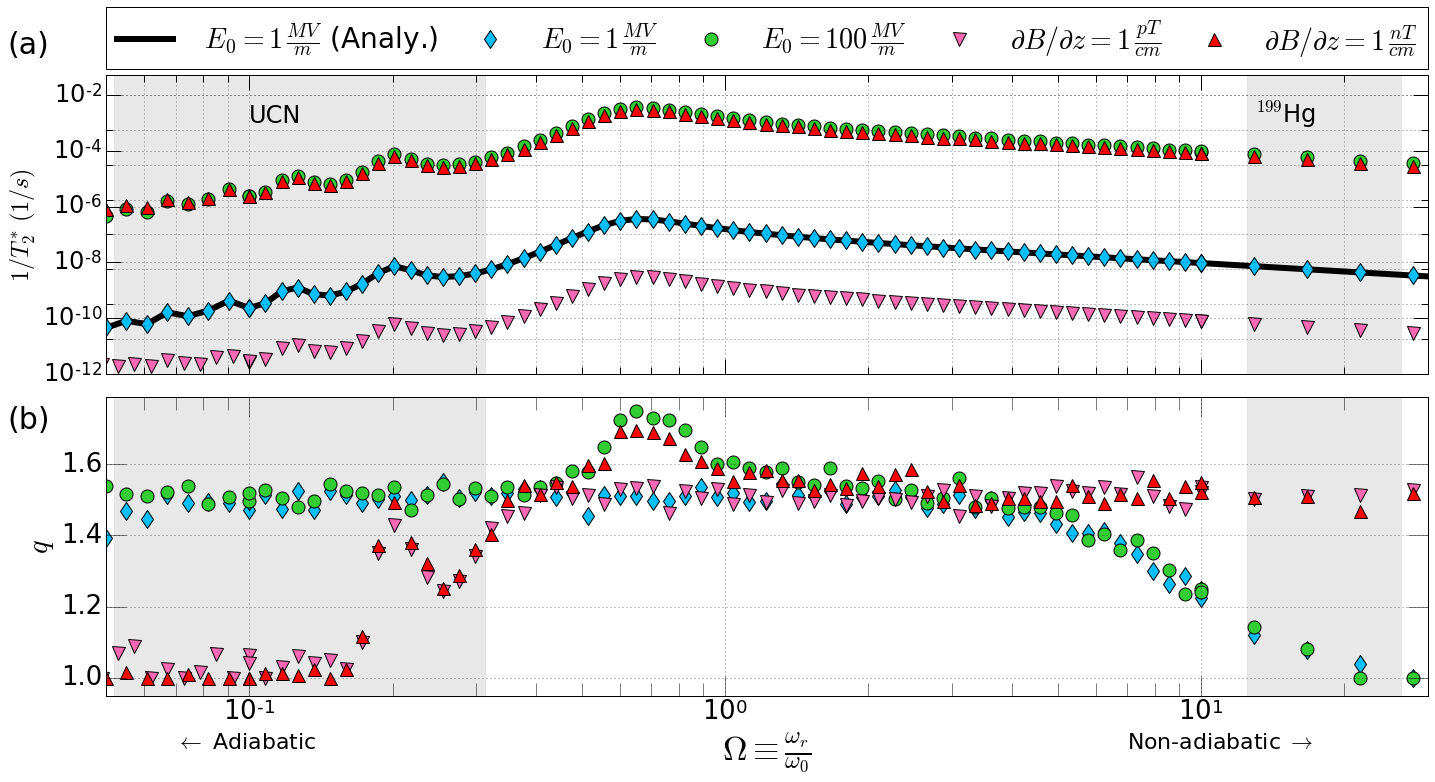

In [9]:
rcParams['figure.figsize'] = 10, 6
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22

# rcParams['ytick.major.pad']='8'

# lines = [range(7393,7401)+range(5884, 5944)+range(7159,7169),range(7401,7409)+range(6744, 6804)+range(7044,7054)]
# variables = ['MeanVel','MeanVel']
# legend_titles=[r"$E_0=1 \,\frac{MV}{m}$",r"$\partial B /\partial Z=1 \,\frac{nT}{cm}$"]
# x_lambdas=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x/(0.235*4.84578839927e7*1e-6)]

lines = [
         range(7393,7401)+range(5884, 5944)+range(7159,7169),
         range(7385,7393)+range(6804, 6864)+range(7169,7179),
         range(6534, 6564)+range(6348, 6408)+range(7149,7159),
         range(7401,7409)+range(6744, 6804)+range(7044,7054)]
variables = [
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel']
legend_titles=[r"$E_0= 1\,\frac{MV}{m}$",
               r"$E_0= 100\,\frac{MV}{m}$",
               r"$\partial B /\partial z=1\,\frac{pT}{cm}$",
               r"$\partial B /\partial z=1\,\frac{nT}{cm}$"]
x_lambdas=[
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6)]


plot_type="SzDetProb"
y_axis_title=r"$1/T_2^*\,(1/s)$"

# x_axis_title = r'$\Omega\equiv\frac{\omega_r}{\omega_0}$'
x_axis_title=""


# colors=['deepskyblue','red']
# marker = itertools.cycle(('o', '^')) 
colors=['deepskyblue','limegreen','hotpink','r']
markers = ['d', 'o', 'v', '^']

fig1 = plt.figure(figsize=[20,10])
ax = fig1.add_subplot(2, 1, 1)
#Bob data
data = np.genfromtxt('/home/mjbales/work/nedm/hists/Bob_InvT2_Analytical.txt', delimiter='\t',names="X,Y")
plt.plot(data["X"], data["Y"],label = r" $E_0= 1\,\frac{MV}{m}$ (Analy.)",color="black",linestyle="-",linewidth=6)
for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:1/(-100/math.log(1-2*x)),x_lambdas[i],lambda x:1/(-100/math.log(1-2*x))]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=["",x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    ms=13
#     if i == 1:
#         ms=11
#     if i==0:
#     plt.errorbar(x, y,label = legend_titles[i],c=colors[i],marker=markers[i],markeredgecolor="deepskyblue",markeredgewidth=2.0,ms=ms,linestyle="")
#     else:
    plt.errorbar(x, y,label = legend_titles[i],c=colors[i],marker=markers[i],markeredgecolor="black",markeredgewidth=1.0,ms=ms,linestyle="")


    
axis_range=[ 0.05, 30, 1e-12,0.05]
plt.axis(axis_range)
plt.xscale('log', noncvposy='clip')
plt.yscale('log', noncvposy='clip')

plt.tick_params(labelsize=24)

# Setting the x-axis major tick's location
# ax.set_yticks([1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10])
ax.set_yticks([1e-12,1e-10,1e-8,1e-6,1e-4,1e-2])
ax.set_yticks(np.logspace(-12.0, -2.0, num=9),minor=True)
# ax.set_yticks(np.logspace(2.0, 10.0, num=9),minor=True)
ax.grid(True, which='major')
# Setting the x-axis major tick's label
# ax.set_yticklabels([r"$10^2$",'',r'$10^4$','',r'$10^6$','',r'$10^8$',1e10])


plt.xlabel(titles[1], fontsize=34)
plt.ylabel(titles[2], fontsize=24)
plt.title(titles[0], fontsize=24)
plt.grid(True,which="both")


ax.tick_params('both', length=15, width=1, which='major')
ax.tick_params('both', length=7, width=1, which='minor')
ax.add_patch(matplotlib.patches.Rectangle((12.469,axis_range[3]),26.34-12.469,axis_range[2]-axis_range[3],fill=True,color="lightgray",alpha=0.5))
ax.text(13,1e-3,r'$^{199}$Hg',fontsize=24)
ax.add_patch(matplotlib.patches.Rectangle((0.052,axis_range[3]),0.313-0.052,axis_range[2]-axis_range[3],fill=True,color="lightgray",alpha=0.5))
ax.text(.1,1e-3,r'UCN',fontsize=24)
# ax.text(3,1e-14,r'Non-adiabatic $\rightarrow$',fontsize=24)
# ax.text(.07,1e-14,r'$\leftarrow$ Adiabatic',fontsize=24)
ax.text(.031,.3,r'(a)',fontsize=30)
handles, labels = ax.get_legend_handles_labels()
handles=handles[1:3]+handles[:1]+handles[3:5]
labels=labels[1:3]+labels[:1]+labels[3:5]
# sort both labels and handles by labels
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
# plt.legend(handles, labels,bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#            ncol=5, mode="expand", borderaxespad=0., fontsize=24,numpoints=1)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0., fontsize=28,numpoints=1)
ax.set_xticklabels([])

# plt.savefig("/home/mjbales/work/nedm/graphs/Fig2.pdf", bbox_inches='tight', dpi=600)
# plt.show()
lines = [
         range(7393,7401)+range(5884, 5944)+range(7159,7169),
         range(7385,7393)+range(6804, 6864)+range(7169,7179),
         range(6534, 6564)+range(6348, 6408)+range(7149,7159),
         range(7401,7409)+range(6744, 6804)+range(7044,7054)]
variables = [
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel']
legend_titles=[r"$E_0= 1\,\frac{MV}{m}$",
               r"$E_0= 100\,\frac{MV}{m}$",
               r"$\partial B /\partial z=1\,\frac{pT}{cm}$",
               r"$\partial B /\partial z=1\,\frac{nT}{cm}$"]
x_lambdas=[
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6)]

rcParams['figure.figsize'] = 10, 5
rcParams['xtick.labelsize'] = 26
rcParams['ytick.labelsize'] = 26
plot_type="PhiQGaussianQ"
y_axis_title=r"$q$"


main_title = ''
x_axis_title = r'$\Omega\equiv\frac{\omega_r}{\omega_0}$'


colors=['deepskyblue','limegreen','hotpink','r']
markers = ['d', 'o', 'v', '^']

# fig1 = plt.figure(figsize=[10,5])
ax = fig1.add_subplot(2, 1, 2)
for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:x,x_lambdas[i],lambda x:x]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=[main_title,x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    ms=13
#     if i == 1:
#         ms=10
    plt.errorbar(x, y,label = legend_titles[i],c=colors[i],markeredgecolor="black",markeredgewidth=1.0,marker=markers[i],ms=ms,linestyle="")
plt.axis([ .05, 30,.95,1.79])
# plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.tick_params(labelsize=26,length=20)
plt.tick_params(length=13, which='minor')
plt.xlabel(titles[1], fontsize=34)
plt.ylabel(titles[2], fontsize=28)
plt.title(titles[0], fontsize=26)
plt.grid(True)
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0., fontsize=26,numpoints=1)
ax.add_patch(matplotlib.patches.Rectangle((12.469,.95),26.34-12.469,1.79-.95,fill=True,color="lightgray",alpha=0.5))
# ax.text(13,1.7,r'$^{199}$Hg',fontsize=22)
ax.add_patch(matplotlib.patches.Rectangle((0.052,.95),0.313-0.052,1.79-.95,fill=True,color="lightgray",alpha=0.5))
# ax.text(.1,1.7,r'UCN',fontsize=22)
ax.text(7,.8,r'Non-adiabatic $\rightarrow$',fontsize=22)
ax.text(.07,.8,r'$\leftarrow$ Adiabatic',fontsize=22)
ax.text(.031,1.7,r'(b)',fontsize=30)
# ax.text(.03,1.4,r'$\leftarrow$ Gaussian',fontsize=22,rotation="vertical")
ax.set_yticks([1,1.2,1.4,1.6])
plt.tight_layout()
plt.savefig("/home/mjbales/work/nedm/graphs/Fig2.eps", bbox_inches='tight', dpi=600)
plt.show()

                        


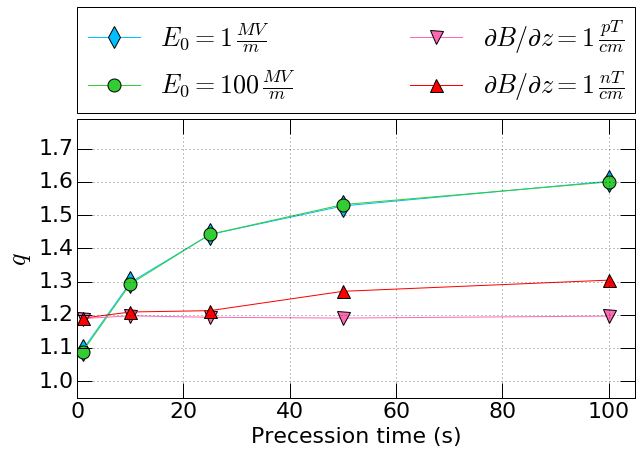

In [10]:
rcParams['figure.figsize'] = 10, 5
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22
variable = 'TimeLimit'
main_title = ''
x_axis_title = r'Precession time (s)'
lambda_func=[lambda x:x,lambda x:x,lambda x:x,lambda x:x]
# lines = [range(7367,7373),range(7379,7385),range(7373,7378),range(7289,7295),range(7295,7301),range(7301,7306),range(7283,7288),range(7277,7282),range(7265,7271),range(7271,7277)]
# legend_titles=["Hg 293 K, 1MV/m","Hg 293K, 1 pT/cm","Hg 293K, 1 nT/cm","UCN 3.5e-3 K, 1 MV/m","UCN 3.5e-3 K, 1 nT/cm","UCN 3.5e-3 K, 1 pT/cm","Hg 293 K, 1 MV/m, 1 nT/cm","Hg 293 K, 1 MV/m, 1 pT/cm","UCN 3.5e-3 K, 1 MV/m, 1 nT/cm","UCN 3.5e-3 K, 1 MV/m, 1 pT/cm"]
lines = [range(7367,7372),range(7480,7485),range(7379,7385),range(7373,7378)]
legend_titles=[r"$E_0= 1\,\frac{MV}{m}$",
               r"$E_0= 100\,\frac{MV}{m}$",
               r"$\partial B /\partial z=1\,\frac{pT}{cm}$",
               r"$\partial B /\partial z=1\,\frac{nT}{cm}$"]
config_type='Par'


plot_type="PhiQGaussianQ"
y_axis_title=r'$q$'
data=[]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
colors=['deepskyblue','limegreen','hotpink','r']
markers = ['d', 'o', 'v', '^']
fig1 = plt.figure(figsize=[10,5])
ax = fig1.add_subplot(1, 1, 1)
for i in range(len(lines)):
    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variable,full_plot_type])
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    ms=13
    if i == 0:
        ms=15
    plt.plot(x, y,label = legend_titles[i],color=colors[i],linestyle="-",markeredgecolor="black",markeredgewidth=1.0,marker=markers[i],ms=ms)

plt.axis([ 0, 105,.95,1.79])

# plt.xscale('log', noncvposy='clip')
plt.tick_params(labelsize=22,length=13)
plt.tick_params('both', length=15, width=1, which='major')
plt.tick_params('both', length=7, width=1, which='minor')
plt.xlabel(titles[1], fontsize=22)
plt.ylabel(titles[2], fontsize=26)
plt.title(titles[0], fontsize=22)
plt.grid(True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize=26,numpoints=1)
plt.savefig("/home/mjbales/work/nedm/graphs/Fig3.eps", bbox_inches='tight', dpi=600)
plt.show()

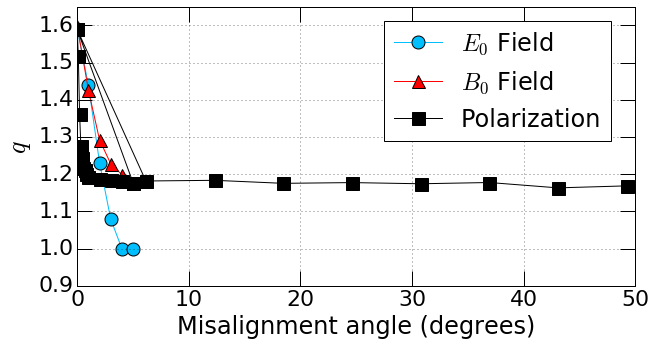

In [3]:
rcParams['figure.figsize'] = 10, 5
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22
main_title = ''
x_axis_title = r'Misalignment angle (degrees)'


for plot_type in ["PhiQGaussianQ"]:
    lambda_func=[lambda x:math.acos(float(x.split(' ')[2]))*180/np.pi,lambda x:x,lambda x:x,lambda x:x]
    linestyle="-"
    legend_header=r""
    if plot_type == "PhiSkewness":
        linestyle="--"
        legend_header=r"Skewness - "
    y_axis_title=r"$q$"
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=[main_title,x_axis_title,y_axis_title]
    
    data = srkdata.get_plot_data_from_database_mult([range(7323, 7329)], ['E0FieldDirection',full_plot_type])
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.errorbar(x, y,label = legend_header+r"$E_0$ Field",c="deepskyblue",markeredgecolor="black",markeredgewidth=1.0,linestyle=linestyle,marker="o",ms=13)


    data = srkdata.get_plot_data_from_database_mult([range(7329, 7335)], ['B0FieldDirection',full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.errorbar(x, y,label = legend_header+r"$B_0$ Field",c="red",markeredgecolor="black",markeredgewidth=1.0,linestyle=linestyle,marker="^",ms=13)

   
    lambda_func[0]=lambda x:x*180./np.pi

    data = srkdata.get_plot_data_from_database_mult([[7323]+range(7359,7366)+range(7318, 7323)+range(7558,7572)], ['ThetaStart',full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.errorbar(x, y,label = legend_header+r"Polarization",markeredgecolor="black",markeredgewidth=1.0,c="black",linestyle=linestyle,marker="s",ms=13)
plt.axis([ 0.00, 50 , .9,1.65])
# plt.xscale('log', noncvposy='clip')
plt.tick_params(labelsize=22)
plt.tick_params('both', length=15, width=1, which='major')
plt.tick_params('both', length=7, width=1, which='minor')
plt.xlabel(titles[1], fontsize=24)
plt.ylabel(titles[2], fontsize=26)
plt.title(titles[0], fontsize=24)
plt.grid(True)
plt.legend(numpoints=1,bbox_to_anchor=(0.55, .95), loc=2, borderaxespad=0., fontsize=24)
plt.savefig("/home/mjbales/work/nedm/graphs/Fig4.eps", bbox_inches='tight', dpi=600)
plt.show()

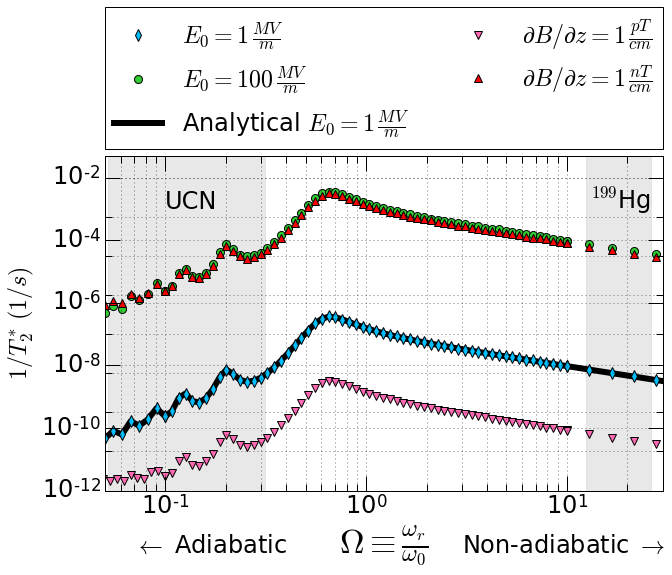

In [88]:
rcParams['figure.figsize'] = 10, 6
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22

# rcParams['ytick.major.pad']='8'

# lines = [range(7393,7401)+range(5884, 5944)+range(7159,7169),range(7401,7409)+range(6744, 6804)+range(7044,7054)]
# variables = ['MeanVel','MeanVel']
# legend_titles=[r"$E_0=1 \,\frac{MV}{m}$",r"$\partial B /\partial Z=1 \,\frac{nT}{cm}$"]
# x_lambdas=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x/(0.235*4.84578839927e7*1e-6)]

lines = [
         range(7393,7401)+range(5884, 5944)+range(7159,7169),
         range(7385,7393)+range(6804, 6864)+range(7169,7179),
         range(6534, 6564)+range(6348, 6408)+range(7149,7159),
         range(7401,7409)+range(6744, 6804)+range(7044,7054)]
variables = [
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel']
legend_titles=[r"$E_0= 1\,\frac{MV}{m}$",
               r"$E_0= 100\,\frac{MV}{m}$",
               r"$\partial B /\partial z=1\,\frac{pT}{cm}$",
               r"$\partial B /\partial z=1\,\frac{nT}{cm}$"]
x_lambdas=[
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6)]


plot_type="SzDetProb"
y_axis_title=r"$1/T_2^*\,(1/s)$"

x_axis_title = r'$\Omega\equiv\frac{\omega_r}{\omega_0}$'


# colors=['deepskyblue','red']
# marker = itertools.cycle(('o', '^')) 
colors=['deepskyblue','limegreen','hotpink','r']
markers = ['d', 'o', 'v', '^']

fig1 = plt.figure(figsize=[10,6])
ax = fig1.add_subplot(1, 1, 1)
#Bob data
data = np.genfromtxt('/home/mjbales/work/nedm/hists/Bob_InvT2_Analytical.txt', delimiter='\t',names="X,Y")
plt.plot(data["X"], data["Y"],label = r"Analytical $E_0= 1\,\frac{MV}{m}$",color="black",linestyle="-",linewidth=6)
for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:1/(-100/math.log(1-2*x)),x_lambdas[i],lambda x:1/(-100/math.log(1-2*x))]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=["",x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    ms=8
#     if i == 1:
#         ms=11
#     if i==0:
#     plt.errorbar(x, y,label = legend_titles[i],c=colors[i],marker=markers[i],markeredgecolor="deepskyblue",markeredgewidth=2.0,ms=ms,linestyle="")
#     else:
    plt.errorbar(x, y,label = legend_titles[i],c=colors[i],marker=markers[i],markeredgecolor="black",markeredgewidth=1.0,ms=ms,linestyle="")


    
axis_range=[ 0.05, 30, 1e-12,0.05]
plt.axis(axis_range)
plt.xscale('log', noncvposy='clip')
plt.yscale('log', noncvposy='clip')

plt.tick_params(labelsize=24)

# Setting the x-axis major tick's location
# ax.set_yticks([1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10])
ax.set_yticks([1e-12,1e-10,1e-8,1e-6,1e-4,1e-2])
ax.set_yticks(np.logspace(-12.0, -2.0, num=9),minor=True)
# ax.set_yticks(np.logspace(2.0, 10.0, num=9),minor=True)
ax.grid(True, which='major')
# Setting the x-axis major tick's label
# ax.set_yticklabels([r"$10^2$",'',r'$10^4$','',r'$10^6$','',r'$10^8$',1e10])


plt.xlabel(titles[1], fontsize=34)
plt.ylabel(titles[2], fontsize=24)
plt.title(titles[0], fontsize=24)
plt.grid(True,which="both")


ax.tick_params('both', length=15, width=1, which='major')
ax.tick_params('both', length=7, width=1, which='minor')
ax.add_patch(matplotlib.patches.Rectangle((12.469,axis_range[3]),26.34-12.469,axis_range[2]-axis_range[3],fill=True,color="lightgray",alpha=0.5))
ax.text(13,1e-3,r'$^{199}$Hg',fontsize=24)
ax.add_patch(matplotlib.patches.Rectangle((0.052,axis_range[3]),0.313-0.052,axis_range[2]-axis_range[3],fill=True,color="lightgray",alpha=0.5))
ax.text(.1,1e-3,r'UCN',fontsize=24)
ax.text(3,1e-14,r'Non-adiabatic $\rightarrow$',fontsize=24)
ax.text(.07,1e-14,r'$\leftarrow$ Adiabatic',fontsize=24)

handles, labels = ax.get_legend_handles_labels()
handles=handles[1:3]+handles[:1]+handles[3:5]
labels=labels[1:3]+labels[:1]+labels[3:5]
# sort both labels and handles by labels
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
plt.legend(handles, labels,bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize=24,numpoints=1)


plt.savefig("/home/mjbales/work/nedm/graphs/Fig2old.pdf", bbox_inches='tight', dpi=600)
plt.show()

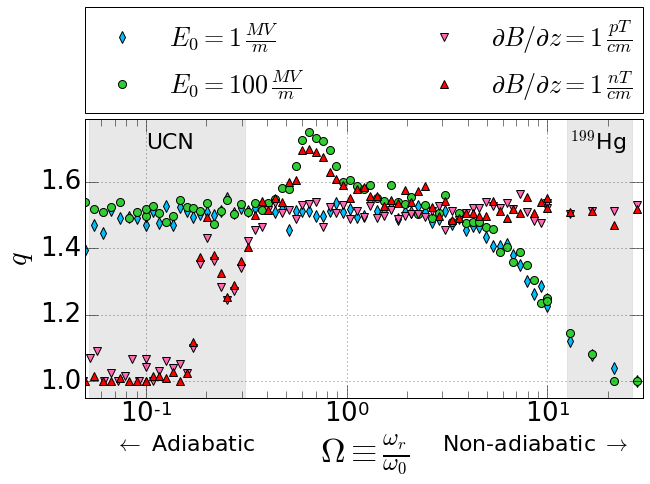

In [89]:
lines = [
         range(7393,7401)+range(5884, 5944)+range(7159,7169),
         range(7385,7393)+range(6804, 6864)+range(7169,7179),
         range(6534, 6564)+range(6348, 6408)+range(7149,7159),
         range(7401,7409)+range(6744, 6804)+range(7044,7054)]
variables = [
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel']
legend_titles=[r"$E_0= 1\,\frac{MV}{m}$",
               r"$E_0= 100\,\frac{MV}{m}$",
               r"$\partial B /\partial z=1\,\frac{pT}{cm}$",
               r"$\partial B /\partial z=1\,\frac{nT}{cm}$"]
x_lambdas=[
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6)]

rcParams['figure.figsize'] = 10, 5
rcParams['xtick.labelsize'] = 26
rcParams['ytick.labelsize'] = 26
plot_type="PhiQGaussianQ"
y_axis_title=r"$q$"


main_title = ''
x_axis_title = r'$\Omega\equiv\frac{\omega_r}{\omega_0}$'


colors=['deepskyblue','limegreen','hotpink','r']
markers = ['d', 'o', 'v', '^']

fig1 = plt.figure(figsize=[10,5])
ax = fig1.add_subplot(1, 1, 1)
for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:x,x_lambdas[i],lambda x:x]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=[main_title,x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    ms=8
#     if i == 1:
#         ms=10
    plt.errorbar(x, y,label = legend_titles[i],c=colors[i],markeredgecolor="black",markeredgewidth=1.0,marker=markers[i],ms=ms,linestyle="")
plt.axis([ .05, 30,.95,1.79])
# plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.tick_params(labelsize=26,length=13)
plt.tick_params(length=7, which='minor')
plt.xlabel(titles[1], fontsize=34)
plt.ylabel(titles[2], fontsize=28)
plt.title(titles[0], fontsize=26)
plt.grid(True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize=26,numpoints=1)
ax.add_patch(matplotlib.patches.Rectangle((12.469,.95),26.34-12.469,1.79-.95,fill=True,color="lightgray",alpha=0.5))
ax.text(13,1.7,r'$^{199}$Hg',fontsize=22)
ax.add_patch(matplotlib.patches.Rectangle((0.052,.95),0.313-0.052,1.79-.95,fill=True,color="lightgray",alpha=0.5))
ax.text(.1,1.7,r'UCN',fontsize=22)
ax.text(3,.79,r'Non-adiabatic $\rightarrow$',fontsize=22)
ax.text(.07,.79,r'$\leftarrow$ Adiabatic',fontsize=22)
ax.set_yticks([1,1.2,1.4,1.6])
plt.savefig("/home/mjbales/work/nedm/graphs/Fig3.pdf", bbox_inches='tight', dpi=600)

plt.show()

                        


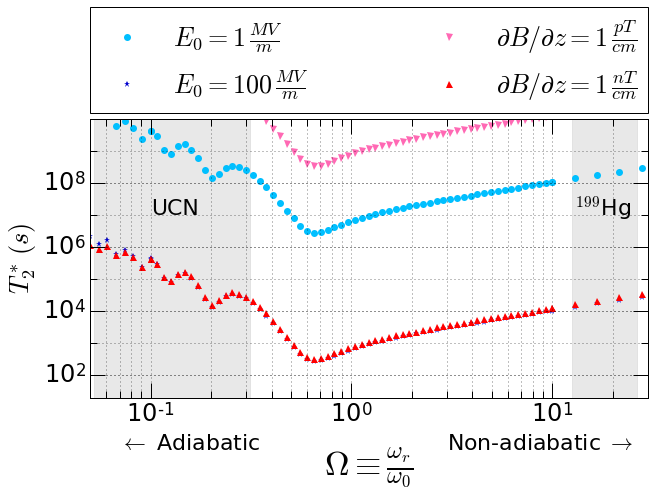

In [10]:
rcParams['figure.figsize'] = 10, 5
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22

# lines = [range(7393,7401)+range(5884, 5944)+range(7159,7169),range(7401,7409)+range(6744, 6804)+range(7044,7054)]
# variables = ['MeanVel','MeanVel']
# legend_titles=[r"$E_0=1 \,\frac{MV}{m}$",r"$\partial B /\partial Z=1 \,\frac{nT}{cm}$"]
# x_lambdas=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x/(0.235*4.84578839927e7*1e-6)]

lines = [
         range(7393,7401)+range(5884, 5944)+range(7159,7169),
         range(7385,7393)+range(6804, 6864)+range(7169,7179),
         range(6534, 6564)+range(6348, 6408)+range(7149,7159),
         range(7401,7409)+range(6744, 6804)+range(7044,7054)]
variables = [
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel']
legend_titles=[r"$E_0= 1\,\frac{MV}{m}$",
               r"$E_0= 100\,\frac{MV}{m}$",
               r"$\partial B /\partial z=1\,\frac{pT}{cm}$",
               r"$\partial B /\partial z=1\,\frac{nT}{cm}$"]
x_lambdas=[
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6)]


plot_type="SzDetProb"
y_axis_title=r"$T_2^*\,(s)$"

x_axis_title = r'$\Omega\equiv\frac{\omega_r}{\omega_0}$'


# colors=['deepskyblue','red']
# marker = itertools.cycle(('o', '^')) 
colors=['deepskyblue','mediumblue','hotpink','r']
markers = ['o', '*', 'v', '^']

fig1 = plt.figure(figsize=[10,5])
ax = fig1.add_subplot(1, 1, 1)
for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:-100/math.log(1-2*x),x_lambdas[i],lambda x:-100/math.log(1-2*x)]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=["",x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.errorbar(x, y,label = legend_titles[i],c=colors[i],markeredgecolor=colors[i],markeredgewidth=0.0,marker=markers[i],ms=7,linestyle="")
plt.axis([ 0.05, 30, 20,1e9])
plt.xscale('log', noncvposy='clip')
plt.yscale('log', noncvposy='clip')

plt.tick_params(labelsize=24)

# Setting the x-axis major tick's location
# ax.set_yticks([1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10])
ax.set_yticks([1e2,1e4,1e6,1e8])
ax.set_yticks(np.logspace(2.0, 10.0, num=9),minor=True)
ax.grid(True, which='both')
# Setting the x-axis major tick's label
# ax.set_yticklabels([r"$10^2$",'',r'$10^4$','',r'$10^6$','',r'$10^8$',1e10])

print 
plt.xlabel(titles[1], fontsize=34)
plt.ylabel(titles[2], fontsize=26)
plt.title(titles[0], fontsize=26)
plt.grid(True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize=26,numpoints=1)
ax.add_patch(matplotlib.patches.Rectangle((12.469,20),26.34-12.469,1e10-20,fill=True,color="lightgray",alpha=0.5))
ax.text(13,1e7,r'$^{199}$Hg',fontsize=22)
ax.tick_params('both', length=15, width=1, which='major')
ax.tick_params('both', length=7, width=1, which='minor')
ax.xaxis.labelpad = 20
ax.add_patch(matplotlib.patches.Rectangle((0.052,20),0.313-0.052,1e10-20,fill=True,color="lightgray",alpha=0.5))
ax.text(.1,1e7,r'UCN',fontsize=22)
ax.text(3,.5,r'Non-adiabatic $\rightarrow$',fontsize=22)
ax.text(.07,.5,r'$\leftarrow$ Adiabatic',fontsize=22)
# plt.legend(numpoints=1,bbox_to_anchor=(0.55, .6), loc=2, borderaxespad=0., fontsize=28)

# ax = plt.gca()
# ax2 = ax.twinx()
# ax2.set_ylim(141/1e-8,141/10)
# y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
# ax2.yaxis.set_major_formatter(y_formatter)

plt.savefig("/home/mjbales/work/nedm/graphs/NonGaussPaper_T2.pdf", bbox_inches='tight', dpi=600)
plt.show()

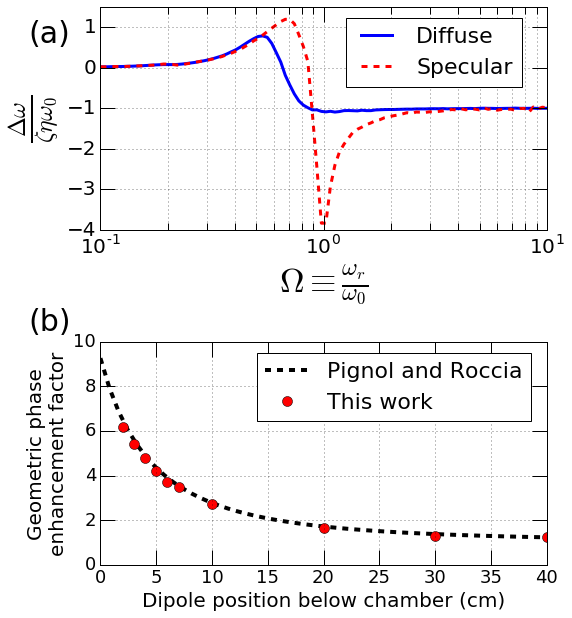

In [4]:
lines = [range(917, 1017),range(1217, 1317)]
legend_tiles = ["Diffuse","Specular"]
color=['blue','red']
linestyles=['-','--']

rcParams['figure.figsize'] = 8, 10
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 18
fig=plt.figure(1)
plt.subplot(211)
fig.subplots_adjust(hspace=.5)

x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "DeltaOmega")
for i in range(len(lines)):
    zeta=1e-8*0.235/(2.*1e-6)
    Omega=[j/Omega_scale_factor for j in x[i]]
    scaled_edm=[j/(zeta*eta*omega_0) for j in y[i]]
    plt.semilogx(Omega,scaled_edm,marker='',label = legend_tiles[i],c=color[i],linestyle=linestyles[i],linewidth=3)

plt.tick_params(labelsize=20)
plt.xlabel(r'$\Omega\equiv\frac{\omega_r}{\omega_0}$', fontsize=34)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=34)
# plt.title('2D Simulation, Linear Magnetic Gradient', fontsize=22)
plt.grid(True,which="both")
plt.tick_params('both', length=15, width=1, which='major')
plt.tick_params('both', length=7, width=1, which='minor')
plt.axis([ 0.1, 10,-4, 1.5])
plt.legend(bbox_to_anchor=(0.55, .95), loc=2, borderaxespad=0., fontsize=22)
plt.figtext(0, .85, r'(a)', fontsize=30)


rcParams['xtick.labelsize'] = 18
plt.subplot(212)
x=np.linspace(0., 40, num = 50)
y=[]
for dist in x:
    y+=[srkanalysis.calc_e_plus_one(1, 0.24, 0.12, dist/100)]
plt.plot(x,y,linestyle='--', c='black',linewidth=4,label = "Pignol and Roccia")
lines = [range(4822,4828)+range(5460,5464),range(4833,4839)+range(5464,5468),range(4844,4850)+range(5468,5472),range(4855,4861)+range(5472,5476),range(4866,4872)+range(5476,5480)]
data = srkdata.get_plot_data_from_database_mult(lines, ["DipolePositionBelowChamber","FalseEDM","FalseEDMError","PRPrediction","PREPlusOne"])
fixed_data=[]
for line in [data[0]]:
    fixed_line=[]
    for point in zip(*line):
        fixed_line.append([-point[0]*100,-point[4]*point[1]/point[3],point[4]*point[2]/point[3]])
    fixed_line=zip(*fixed_line)
    fixed_data.append(fixed_line)
    plt.plot(fixed_line[0],fixed_line[1],'o',marker='o',c='red',label = "This work",ms=10)

plt.xlabel(r'Dipole position below chamber (cm)', fontsize=20)
plt.ylabel('Geometric phase\nenhancement factor', fontsize=20)
titles=["","","E+1"]
# srkgraphics.make_plot_from_data(fixed_data, titles)
# plt.xscale('log', noncvposy='clip')
plt.grid(True)
plt.axis([ 0.0, 40,0, 10])
plt.tick_params('both', length=15, width=1, which='major')
plt.tick_params('both', length=7, width=1, which='minor')
plt.legend(bbox_to_anchor=(0.35, .95), loc=2, borderaxespad=0., fontsize=22,numpoints=1)
plt.figtext(0, .45, r'(b)', fontsize=30)
plt.savefig("/home/mjbales/work/nedm/graphs/NonGaussPaper_Validation.eps", bbox_inches='tight', dpi=200)
plt.show()


100 12.3726338305 0.0572079896473
100 20.1850794547 3.89112902246e-06
150 23.588992931 5.74256360908e-06
Parameters:  8240.75781272 0.996133563659 1.30467184649
Parameters:  11458.0841502 2.62182831566 1.60008682116
Parameters:  4069.00000008 321.12504658 2.57510590273


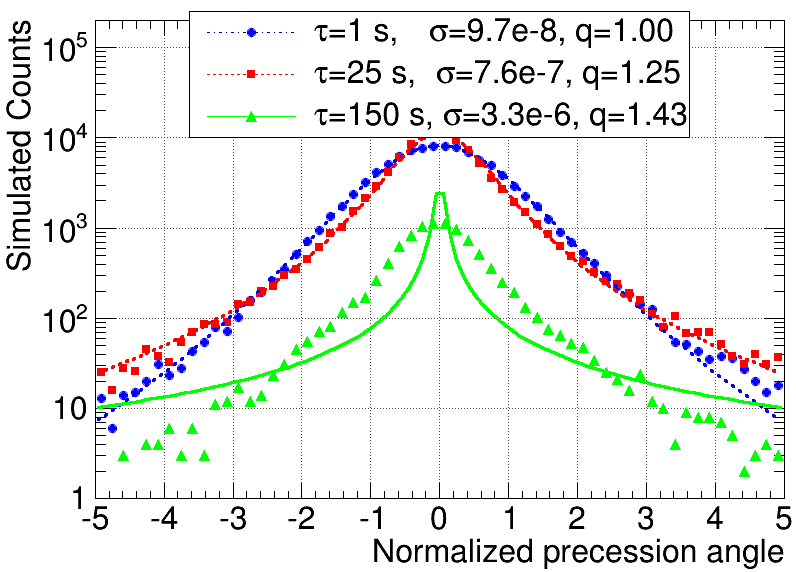

In [37]:
gStyle.SetTextFont(42);
gStyle.SetTitleFont(42,"xyz");
gStyle.SetLabelFont(42);
gStyle.SetLegendFont(42);
c1.Clear()
c1.SetLeftMargin(0.12)
c1.SetRightMargin(0.01)
c1.SetBottomMargin(0.12)
c1.SetTopMargin(0.01)

rid=7377
rid2=7371
rid3=7358
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,time, kurtosis= srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit,"+par_str+"PhiKurtosis")[0]
print time, kurtosis, stdev
histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",60,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
c1.SetGridx()
c1.SetGridy()
c1.SetLeftMargin(0.1197034);
c1.SetRightMargin(0.01483051);
c1.SetTopMargin(0.03597122);
c1.SetBottomMargin(0.1280576);
histogram.SetTitle(";Normalized precession angle;Simulated Counts")
histogram.SetStats(False)
histogram.GetYaxis().SetTitleOffset(1.0)
histogram.GetYaxis().SetLabelSize(0.06)
histogram.GetYaxis().SetTitleSize(0.06)
histogram.GetXaxis().SetLabelSize(0.06)
histogram.GetXaxis().SetTitleSize(0.06)
histogram.GetYaxis().SetRangeUser(1,2e5)
histogram.SetTitle
histogram.SetLineStyle(4)
histogram.SetMarkerStyle(20)
histogram.SetMarkerColor(ROOT.kBlue)

mean,stdev,time, kurtosis= srkdata.get_data_for_rids_from_database([rid2],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit,"+par_str+"PhiKurtosis")[0]
print time, kurtosis, stdev
histogram2.IsA().Destructor( histogram2 )
histogram2 = TH1D("phi_hist2","phi_hist2",60,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist2"
c1=srkgraphics.make_root_plot_from_results_file(rid2,par,drawString)
histogram2.SetTitle("Dipole;Normalized Phi;Counts")
histogram2.SetLineColor(ROOT.kRed)
histogram2.SetMarkerColor(ROOT.kRed)
histogram2.SetLineStyle(2)
histogram2.SetMarkerStyle(21)
histogram2.SetStats(False)

mean,stdev,time, kurtosis= srkdata.get_data_for_rids_from_database([rid3],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit,"+par_str+"PhiKurtosis")[0]
print time, kurtosis, stdev
histogram3.IsA().Destructor( histogram3 )
histogram3 = TH1D("phi_hist3","phi_hist3",60,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist3"
c1=srkgraphics.make_root_plot_from_results_file(rid3,par,drawString)
histogram3.SetTitle("Dipole;Normalized Phi;Counts")
histogram3.SetLineColor(ROOT.kGreen)
histogram3.SetMarkerColor(ROOT.kGreen)
histogram3.SetLineStyle(1)
histogram3.SetMarkerStyle(22)
histogram3.SetMarkerSize(1.5)
histogram3.SetStats(False)

histogram.Draw("HIST P")
histogram2.Draw("HIST P same")
histogram3.Draw("HIST P same")

# c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)

qGaussianFunc = TF1("qGaussianFunc", "[0]*pow(1+([2]-1)*[1]*x*x,-1/([2]-1))", -5,5)
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
qGaussianFunc.SetParNames("Amplitude", "Sigma", "Power");
qGaussianFunc.SetParLimits(1,0.1,20)
qGaussianFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
qGaussianFunc.SetParLimits(2,1.0001,3)
qGaussianFunc.SetParameters(max_bin, stdev,2)
qGaussianFunc.SetLineColor(ROOT.kBlue)
qGaussianFunc.SetLineStyle(4)
qGaussianFunc.SetLineWidth(3)
histogram.Fit("qGaussianFunc","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
qGaussianFunc.Draw("L same")
print "Parameters: ",qGaussianFunc.GetParameter(0),qGaussianFunc.GetParameter(1),qGaussianFunc.GetParameter(2)

qGaussianFunc2 = TF1("qGaussianFunc2", "[0]*pow(1+([2]-1)*[1]*x*x,-1/([2]-1))", -5,5)
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
qGaussianFunc2.SetParNames("Amplitude", "Sigma", "Power");
qGaussianFunc2.SetParLimits(1,0.1,50)
qGaussianFunc2.SetParLimits(0,0.5*max_bin,1.5*max_bin)
qGaussianFunc2.SetParLimits(2,1.0001,3)
qGaussianFunc2.SetParameters(max_bin, stdev,2)
qGaussianFunc2.SetLineStyle(2)
qGaussianFunc2.SetLineWidth(3)
histogram2.Fit("qGaussianFunc2","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
qGaussianFunc2.Draw("L same")
print "Parameters: ",qGaussianFunc2.GetParameter(0),qGaussianFunc2.GetParameter(1),qGaussianFunc2.GetParameter(2)

qGaussianFunc3 = TF1("qGaussianFunc3", "[0]*pow(1+([2]-1)*[1]*x*x,-1/([2]-1))", -5,5)
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
qGaussianFunc3.SetParNames("Amplitude", "Sigma", "Power");
qGaussianFunc3.SetParLimits(1,0.1,1000)
qGaussianFunc3.SetParLimits(0,0.5*max_bin,1.5*max_bin)
qGaussianFunc3.SetParLimits(2,1.0001,3)
qGaussianFunc3.SetParameters(max_bin, stdev,2)
qGaussianFunc3.SetLineColor(ROOT.kGreen)
qGaussianFunc3.SetLineStyle(1)
qGaussianFunc3.SetLineWidth(3)
histogram3.Fit("qGaussianFunc3","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
qGaussianFunc3.Draw("same")
print "Parameters: ",qGaussianFunc3.GetParameter(0),qGaussianFunc3.GetParameter(1),qGaussianFunc3.GetParameter(2)

# gaus = TF1("gaus","369*TMath::Gaus(x,0,1)",-5,5)
# gaus.SetLineColor(ROOT.kGreen)
# gaus.Draw("same")
c1.SetLogy()
leg = TLegend(0.2375424,0.7597122,0.8662712,0.9798561);
   
leg.AddEntry("phi_hist", "#tau=1 s,   #sigma=9.7e-8, q=1.00","pl");
leg.AddEntry("phi_hist2","#tau=25 s,  #sigma=7.6e-7, q=1.25","pl");
leg.AddEntry("phi_hist3","#tau=150 s, #sigma=3.3e-6, q=1.43","pl");
leg.SetTextSize(.06);
leg.Draw("same");

c1.Print(graphs_dir+'NonGaussPaper_TimeDistributions.root')
c1





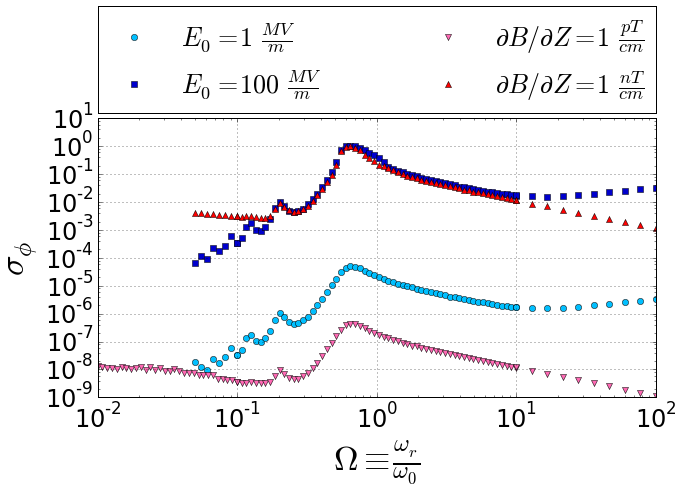

In [25]:
rcParams['figure.figsize'] = 10, 5
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22

# lines = [range(7393,7401)+range(5884, 5944)+range(7159,7169),range(7401,7409)+range(6744, 6804)+range(7044,7054)]
# variables = ['MeanVel','MeanVel']
# legend_titles=[r"$E_0=1 \,\frac{MV}{m}$",r"$\partial B /\partial Z=1 \,\frac{nT}{cm}$"]
# x_lambdas=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x/(0.235*4.84578839927e7*1e-6)]

lines = [
         range(7393,7401)+range(5884, 5944)+range(7159,7169),
         range(7385,7393)+range(6804, 6864)+range(7169,7179),
         range(6534, 6564)+range(6348, 6408)+range(7149,7159),
         range(7401,7409)+range(6744, 6804)+range(7044,7054)]
variables = [
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel']
legend_titles=[r"$E_0= 1\,\frac{MV}{m}$",
               r"$E_0= 100\,\frac{MV}{m}$",
               r"$\partial B /\partial Z=1\,\frac{pT}{cm}$",
               r"$\partial B /\partial Z=1\,\frac{nT}{cm}$"]
x_lambdas=[
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6)]


plot_type="PhiStDev"
y_axis_title=r"$\sigma_{\phi}$"

x_axis_title = r'$\Omega\equiv\frac{\omega_r}{\omega_0}$'


# colors=['deepskyblue','red']
# marker = itertools.cycle(('o', '^')) 
colors=['deepskyblue','mediumblue','hotpink','r']
markers = ['o', 's', 'v', '^']

fig1 = plt.figure(figsize=[10,5])
ax = fig1.add_subplot(1, 1, 1)
for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:x,x_lambdas[i],lambda x:x]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=["",x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.errorbar(x, y,label = legend_titles[i],c=colors[i],marker=markers[i],ms=6,linestyle="")
# plt.axis([ 0.05, 30, 20,1e9])
plt.xscale('log', noncvposy='clip')
plt.yscale('log', noncvposy='clip')

plt.tick_params(labelsize=24)

# Setting the x-axis major tick's location
# ax.set_yticks([1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10])
# ax.set_yticks([1e2,1e4,1e6,1e8])
# ax.set_yticks(np.logspace(2.0, 10.0, num=9),minor=True)
ax.grid(True, which='major')
# Setting the x-axis major tick's label
# ax.set_yticklabels([r"$10^2$",'',r'$10^4$','',r'$10^6$','',r'$10^8$',1e10])

print 
plt.xlabel(titles[1], fontsize=34)
plt.ylabel(titles[2], fontsize=34)
plt.title(titles[0], fontsize=26)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize=26,numpoints=1)
# ax.add_patch(matplotlib.patches.Rectangle((12.469,20),26.34-12.469,1e10-20,fill=True,color="lightgray",alpha=0.5))
# ax.text(13,1e7,r'$^{199}$Hg',fontsize=22)

# ax.add_patch(matplotlib.patches.Rectangle((0.052,20),0.313-0.052,1e10-20,fill=True,color="lightgray",alpha=0.5))
# ax.text(.1,1e7,r'UCN',fontsize=22)
# ax.text(3,.5,r'Non-adiabatic $\rightarrow$',fontsize=22)
# ax.text(.07,.5,r'$\leftarrow$ Adiabatic',fontsize=22)
# plt.legend(numpoints=1,bbox_to_anchor=(0.55, .6), loc=2, borderaxespad=0., fontsize=28)

# ax = plt.gca()
# ax2 = ax.twinx()
# ax2.set_ylim(141/1e-8,141/10)
# y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
# ax2.yaxis.set_major_formatter(y_formatter)
plt.savefig("/home/mjbales/work/nedm/graphs/NonGaussPaper_2DPhiStandardDeviation.pdf", bbox_inches='tight', dpi=600)
plt.show()

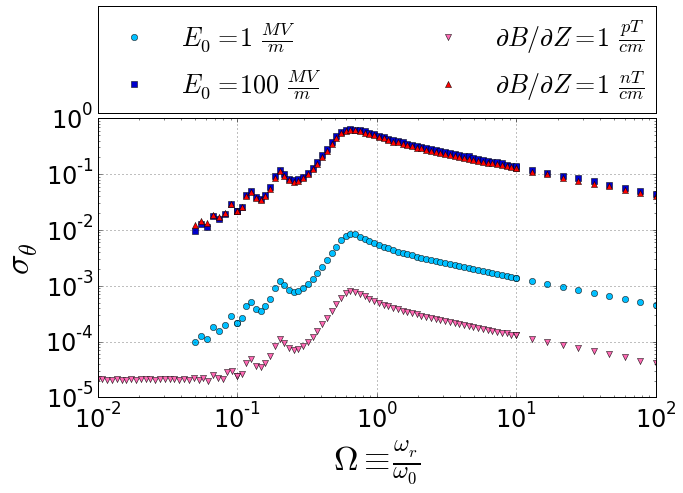

In [24]:
rcParams['figure.figsize'] = 10, 5
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22

# lines = [range(7393,7401)+range(5884, 5944)+range(7159,7169),range(7401,7409)+range(6744, 6804)+range(7044,7054)]
# variables = ['MeanVel','MeanVel']
# legend_titles=[r"$E_0=1 \,\frac{MV}{m}$",r"$\partial B /\partial Z=1 \,\frac{nT}{cm}$"]
# x_lambdas=[lambda x:x/(0.235*4.84578839927e7*1e-6),lambda x:x/(0.235*4.84578839927e7*1e-6)]

lines = [
         range(7393,7401)+range(5884, 5944)+range(7159,7169),
         range(7385,7393)+range(6804, 6864)+range(7169,7179),
         range(6534, 6564)+range(6348, 6408)+range(7149,7159),
         range(7401,7409)+range(6744, 6804)+range(7044,7054)]
variables = [
    'MeanVel',
    'MeanVel',
    'MeanVel',
    'MeanVel']
legend_titles=[r"$E_0= 1\,\frac{MV}{m}$",
               r"$E_0= 100\,\frac{MV}{m}$",
               r"$\partial B /\partial Z=1\,\frac{pT}{cm}$",
               r"$\partial B /\partial Z=1\,\frac{nT}{cm}$"]
x_lambdas=[
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6),
    lambda x:x/(0.235*4.84578839927e7*1e-6)]


plot_type="ThetaStDev"
y_axis_title=r"$\sigma_{\theta}$"

x_axis_title = r'$\Omega\equiv\frac{\omega_r}{\omega_0}$'


# colors=['deepskyblue','red']
# marker = itertools.cycle(('o', '^')) 
colors=['deepskyblue','mediumblue','hotpink','r']
markers = ['o', 's', 'v', '^']

fig1 = plt.figure(figsize=[10,5])
ax = fig1.add_subplot(1, 1, 1)
for i in range(len(lines)):
    lambda_func=[x_lambdas[i],lambda x:x,x_lambdas[i],lambda x:x]
#     lambda_func=lambda_funcs[i]
       
    config_type='Par'
    full_plot_type=config_type + "_" +plot_type
    titles=["",x_axis_title,y_axis_title]

    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variables[i],full_plot_type]) 
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.errorbar(x, y,label = legend_titles[i],c=colors[i],marker=markers[i],ms=6,linestyle="")
# plt.axis([ 0.05, 30, 20,1e9])
plt.xscale('log', noncvposy='clip')
plt.yscale('log', noncvposy='clip')

plt.tick_params(labelsize=24)

# Setting the x-axis major tick's location
# ax.set_yticks([1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10])
# ax.set_yticks([1e2,1e4,1e6,1e8])
# ax.set_yticks(np.logspace(2.0, 10.0, num=9),minor=True)
ax.grid(True, which='major')
# Setting the x-axis major tick's label
# ax.set_yticklabels([r"$10^2$",'',r'$10^4$','',r'$10^6$','',r'$10^8$',1e10])

print 
plt.xlabel(titles[1], fontsize=34)
plt.ylabel(titles[2], fontsize=34)
plt.title(titles[0], fontsize=26)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize=26,numpoints=1)
# ax.add_patch(matplotlib.patches.Rectangle((12.469,20),26.34-12.469,1e10-20,fill=True,color="lightgray",alpha=0.5))
# ax.text(13,1e7,r'$^{199}$Hg',fontsize=22)

# ax.add_patch(matplotlib.patches.Rectangle((0.052,20),0.313-0.052,1e10-20,fill=True,color="lightgray",alpha=0.5))
# ax.text(.1,1e7,r'UCN',fontsize=22)
# ax.text(3,.5,r'Non-adiabatic $\rightarrow$',fontsize=22)
# ax.text(.07,.5,r'$\leftarrow$ Adiabatic',fontsize=22)
# plt.legend(numpoints=1,bbox_to_anchor=(0.55, .6), loc=2, borderaxespad=0., fontsize=28)

# ax = plt.gca()
# ax2 = ax.twinx()
# ax2.set_ylim(141/1e-8,141/10)
# y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
# ax2.yaxis.set_major_formatter(y_formatter)
plt.savefig("/home/mjbales/work/nedm/graphs/NonGaussPaper_2DThetaStandardDeviation.pdf", bbox_inches='tight', dpi=600)
plt.show()

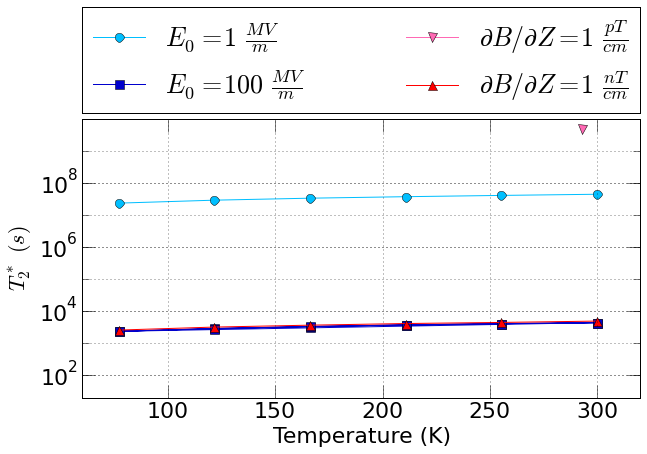

In [21]:
rcParams['figure.figsize'] = 10, 5
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22

variable = 'VelProfHistPath'
main_title = ''
x_axis_title = r'Temperature (K)'
lambda_func=[lambda x:float(x[1:]),lambda x:-100/math.log(1-2*x),lambda x:x,lambda x:x]
# lines = [range(7367,7373),range(7379,7385),range(7373,7378),range(7289,7295),range(7295,7301),range(7301,7306),range(7283,7288),range(7277,7282),range(7265,7271),range(7271,7277)]
# legend_titles=["Hg 293 K, 1MV/m","Hg 293K, 1 pT/cm","Hg 293K, 1 nT/cm","UCN 3.5e-3 K, 1 MV/m","UCN 3.5e-3 K, 1 nT/cm","UCN 3.5e-3 K, 1 pT/cm","Hg 293 K, 1 MV/m, 1 nT/cm","Hg 293 K, 1 MV/m, 1 pT/cm","UCN 3.5e-3 K, 1 MV/m, 1 nT/cm","UCN 3.5e-3 K, 1 MV/m, 1 pT/cm"]
lines = [range(7198,7204),range(7492,7504),range(7421,7422),range(7205,7211)]
legend_titles=[r"$E_0= 1\,\frac{MV}{m}$",
               r"$E_0= 100\,\frac{MV}{m}$",
               r"$\partial B /\partial Z=1\,\frac{pT}{cm}$",
               r"$\partial B /\partial Z=1\,\frac{nT}{cm}$"]
config_type='Par'


plot_type="SzDetProb"
y_axis_title=r"$T_2^*\,(s)$"
data=[]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
colors=['deepskyblue','mediumblue','hotpink','r']
markers = ['o', 's', 'v', '^']

fig1 = plt.figure(figsize=[10,5])
ax = fig1.add_subplot(1, 1, 1)
for i in range(len(lines)):
    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variable,full_plot_type])
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.plot(x, y,label = legend_titles[i],color=colors[i],linestyle="-",marker=markers[i],ms=9)

# plt.axis([ 60, 320,1000,1e8])
plt.axis([ 60, 320, 20,1e9])

plt.yscale('log', noncvposy='clip')

plt.tick_params(labelsize=24)

# Setting the x-axis major tick's location
# ax.set_yticks([1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10])
ax.set_yticks([1e2,1e4,1e6,1e8])
ax.set_yticks(np.logspace(2.0, 10.0, num=9),minor=True)
ax.grid(True, which='both')
# Setting the x-axis major tick's label
# ax.set_yticklabels([r"$10^2$",'',r'$10^4$','',r'$10^6$','',r'$10^8$',1e10])
plt.tick_params(labelsize=22,length=13)
plt.tick_params(length=7, which='minor')
plt.xlabel(titles[1], fontsize=22)
plt.ylabel(titles[2], fontsize=22)
plt.title(titles[0], fontsize=22)
plt.grid(True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize=26,numpoints=1)
plt.savefig("/home/mjbales/work/nedm/graphs/NonGaussPaper_Temperature.png", bbox_inches='tight', dpi=90)
plt.show()

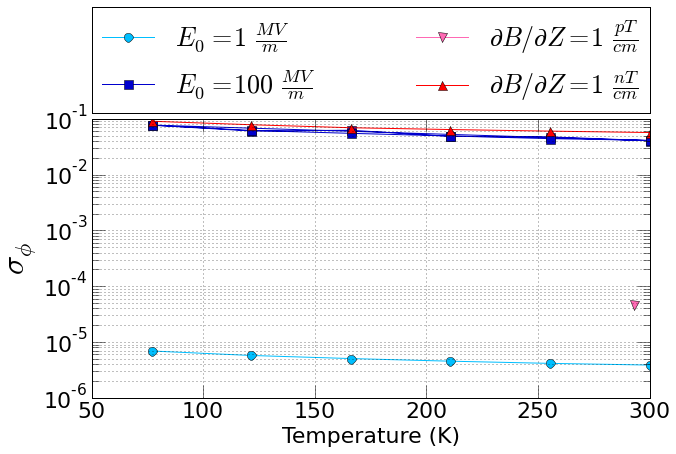

In [22]:
rcParams['figure.figsize'] = 10, 5
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22

variable = 'VelProfHistPath'
main_title = ''
x_axis_title = r'Temperature (K)'
lambda_func=[lambda x:float(x[1:]),lambda x:x,lambda x:x,lambda x:x]
# lines = [range(7367,7373),range(7379,7385),range(7373,7378),range(7289,7295),range(7295,7301),range(7301,7306),range(7283,7288),range(7277,7282),range(7265,7271),range(7271,7277)]
# legend_titles=["Hg 293 K, 1MV/m","Hg 293K, 1 pT/cm","Hg 293K, 1 nT/cm","UCN 3.5e-3 K, 1 MV/m","UCN 3.5e-3 K, 1 nT/cm","UCN 3.5e-3 K, 1 pT/cm","Hg 293 K, 1 MV/m, 1 nT/cm","Hg 293 K, 1 MV/m, 1 pT/cm","UCN 3.5e-3 K, 1 MV/m, 1 nT/cm","UCN 3.5e-3 K, 1 MV/m, 1 pT/cm"]
lines = [range(7198,7204),range(7492,7504),range(7421,7422),range(7205,7211)]
legend_titles=[r"$E_0= 1\,\frac{MV}{m}$",
               r"$E_0= 100\,\frac{MV}{m}$",
               r"$\partial B /\partial Z=1\,\frac{pT}{cm}$",
               r"$\partial B /\partial Z=1\,\frac{nT}{cm}$"]
config_type='Par'


plot_type="PhiStDev"
y_axis_title=r"$\sigma_{\phi}$"
data=[]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
colors=['deepskyblue','mediumblue','hotpink','r']
markers = ['o', 's', 'v', '^']

fig1 = plt.figure(figsize=[10,5])
ax = fig1.add_subplot(1, 1, 1)
for i in range(len(lines)):
    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variable,full_plot_type])
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.plot(x, y,label = legend_titles[i],color=colors[i],linestyle="-",marker=markers[i],ms=9)

# plt.axis([ 60, 320,1000,1e8])
# plt.axis([ 60, 320, 20,1e9])

plt.yscale('log', noncvposy='clip')

plt.tick_params(labelsize=24)

# Setting the x-axis major tick's location
# ax.set_yticks([1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10])
# ax.set_yticks([1e2,1e4,1e6,1e8])
# ax.set_yticks(np.logspace(2.0, 10.0, num=9),minor=True)
ax.grid(True, which='both')
# Setting the x-axis major tick's label
# ax.set_yticklabels([r"$10^2$",'',r'$10^4$','',r'$10^6$','',r'$10^8$',1e10])
plt.tick_params(labelsize=22,length=13)
plt.tick_params(length=7, which='minor')
plt.xlabel(titles[1], fontsize=22)
plt.ylabel(titles[2], fontsize=32)
plt.title(titles[0], fontsize=22)
plt.grid(True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize=26,numpoints=1)
plt.savefig("/home/mjbales/work/nedm/graphs/NonGaussPaper_TemperaturePhiStDev.png", bbox_inches='tight', dpi=90)
plt.show()

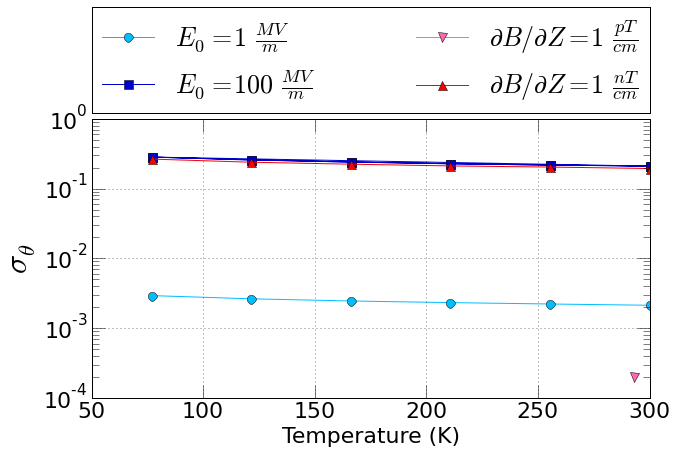

In [23]:
rcParams['figure.figsize'] = 10, 5
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22

variable = 'VelProfHistPath'
main_title = ''
x_axis_title = r'Temperature (K)'
lambda_func=[lambda x:float(x[1:]),lambda x:x,lambda x:x,lambda x:x]
# lines = [range(7367,7373),range(7379,7385),range(7373,7378),range(7289,7295),range(7295,7301),range(7301,7306),range(7283,7288),range(7277,7282),range(7265,7271),range(7271,7277)]
# legend_titles=["Hg 293 K, 1MV/m","Hg 293K, 1 pT/cm","Hg 293K, 1 nT/cm","UCN 3.5e-3 K, 1 MV/m","UCN 3.5e-3 K, 1 nT/cm","UCN 3.5e-3 K, 1 pT/cm","Hg 293 K, 1 MV/m, 1 nT/cm","Hg 293 K, 1 MV/m, 1 pT/cm","UCN 3.5e-3 K, 1 MV/m, 1 nT/cm","UCN 3.5e-3 K, 1 MV/m, 1 pT/cm"]
lines = [range(7198,7204),range(7492,7504),range(7421,7422),range(7205,7211)]
legend_titles=[r"$E_0= 1\,\frac{MV}{m}$",
               r"$E_0= 100\,\frac{MV}{m}$",
               r"$\partial B /\partial Z=1\,\frac{pT}{cm}$",
               r"$\partial B /\partial Z=1\,\frac{nT}{cm}$"]
config_type='Par'


plot_type="ThetaStDev"
y_axis_title=r"$\sigma_{\theta}$"
data=[]
full_plot_type=config_type + "_" +plot_type
titles=[main_title,x_axis_title,y_axis_title]
colors=['deepskyblue','mediumblue','hotpink','r']
markers = ['o', 's', 'v', '^']

fig1 = plt.figure(figsize=[10,5])
ax = fig1.add_subplot(1, 1, 1)
for i in range(len(lines)):
    data = srkdata.get_plot_data_from_database_mult([lines[i]], [variable,full_plot_type])
    x,y= a_line = [map(lambda_func[j], data[0][j]) for j in range(len(data[0]))] # Implement lambda funcs on a line
    plt.plot(x, y,label = legend_titles[i],color=colors[i],linestyle="-",marker=markers[i],ms=9)

# plt.axis([ 60, 320,1000,1e8])
# plt.axis([ 60, 320, 20,1e9])

plt.yscale('log', noncvposy='clip')

plt.tick_params(labelsize=24)

# Setting the x-axis major tick's location
# ax.set_yticks([1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9,1e10])
# ax.set_yticks([1e2,1e4,1e6,1e8])
# ax.set_yticks(np.logspace(2.0, 10.0, num=9),minor=True)
ax.grid(True, which='major')
# Setting the x-axis major tick's label
# ax.set_yticklabels([r"$10^2$",'',r'$10^4$','',r'$10^6$','',r'$10^8$',1e10])
plt.tick_params(labelsize=22,length=13)
plt.tick_params(length=7, which='minor')
plt.xlabel(titles[1], fontsize=22)
plt.ylabel(titles[2], fontsize=32)
plt.title(titles[0], fontsize=22)
plt.grid(True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize=26,numpoints=1)
plt.savefig("/home/mjbales/work/nedm/graphs/NonGaussPaper_TemperatureThetaStDev.png", bbox_inches='tight', dpi=90)
plt.show()